# YZV211 Term Project
## Relationship Analysis Between Electricity Generation, Greenhouse Gas Emissions and Deaths Due to Respiratory Diseases 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [36]:
df_e = pd.read_excel('enerji_kaynakları.xls', engine='xlrd')
df_g = pd.read_excel('sera gazi emisyonlari (milyon ton co2 esdegeri).xls', engine='xlrd')
df_d = pd.read_excel('ölüm_nedenleri.xls', engine='xlrd')

# EDA (Exploratory Data Analysis)

## Energy 

In [37]:
df_e.head(10)

,Enerji kaynaklarına göre elektrik enerjisi üretimi ve payları,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Electricity generation and shares by energy re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yıl,NaN,Toplam,NaN,Kömür,Sıvı yakıtlar,Doğal gaz,Hidrolik,Yenilenebilir Enerji ve Atıklar (1),NaN,NaN
2,Year,NaN,Total,NaN,Coal,Liquid fuels,Natural Gas,Hydro,Renewable Energy and wastes(1),NaN,NaN
3,NaN,NaN,(GWh),NaN,(%),NaN,NaN,NaN,NaN,NaN,NaN
4,1970,NaN,8623,NaN,32.7,30.2,-,35.2,1.9,NaN,NaN
5,1971,NaN,9781,NaN,30.4,41.2,-,26.7,1.7,NaN,NaN
6,1972,NaN,11242,NaN,26,43.9,-,28.5,1.6,NaN,NaN
7,1973,NaN,12425,NaN,26.1,51.3,-,21,1.6,NaN,NaN
8,1974,NaN,13477,NaN,28.8,44.8,-,24.9,1.5,NaN,NaN
9,1975,NaN,15623,NaN,26.3,34.5,-,37.8,1.4,NaN,NaN


In [38]:
df_e_new = df_e.iloc[4:56,[0,2,4,5,6,7,8]] #Clean data

In [39]:
df_e_new.columns = ['Year','Total (GWh)','Coal%','Liquid Fuels%',
                    'Natural Gas%','Hydro%','Renewable Energy and Wastes%']
df_e_new.head()

,Year,Total (GWh),Coal%,Liquid Fuels%,Natural Gas%,Hydro%,Renewable Energy and Wastes%
4,1970,8623,32.7,30.2,-,35.2,1.9
5,1971,9781,30.4,41.2,-,26.7,1.7
6,1972,11242,26,43.9,-,28.5,1.6
7,1973,12425,26.1,51.3,-,21,1.6
8,1974,13477,28.8,44.8,-,24.9,1.5


In [40]:
df_e_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 4 to 55
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Year                          52 non-null     object
 1   Total (GWh)                   52 non-null     object
 2   Coal%                         52 non-null     object
 3   Liquid Fuels%                 52 non-null     object
 4   Natural Gas%                  52 non-null     object
 5   Hydro%                        52 non-null     object
 6   Renewable Energy and Wastes%  52 non-null     object
dtypes: object(7)
memory usage: 3.0+ KB


In [41]:
df_e_new_numeric = df_e_new.apply(pd.to_numeric, errors='coerce') #Categoric to Numeric

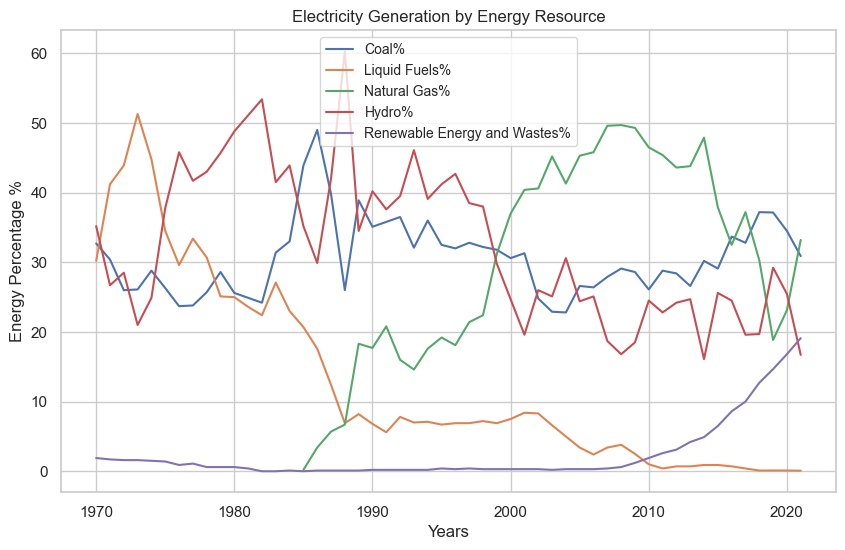

In [42]:
energy_columns = df_e_new_numeric.columns[2:]

# Years 
x = df_e_new_numeric.iloc[:, 0]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Line Plot 
for column in energy_columns:
    y = df_e_new_numeric[column]
    sns.lineplot(x=x, y=y, label=column)

plt.legend(fontsize='small')

plt.title('Electricity Generation by Energy Resource')
plt.xlabel('Years')
plt.ylabel('Energy Percentage %')

plt.show()

- It seems obvious that non-renewable and environmentally harmful methods are mostly preferred in energy production in Turkey.
- The use of liquid fuels in energy production has gradually decreased and is not used at all today.
- The use of renewable energy sources was used little until the 80s, but then they were almost never used for a long time. However, the share of renewable energy sources in energy production has been increasing since 2008. This is a positive development for our country in a world where resources are depleted day by day.

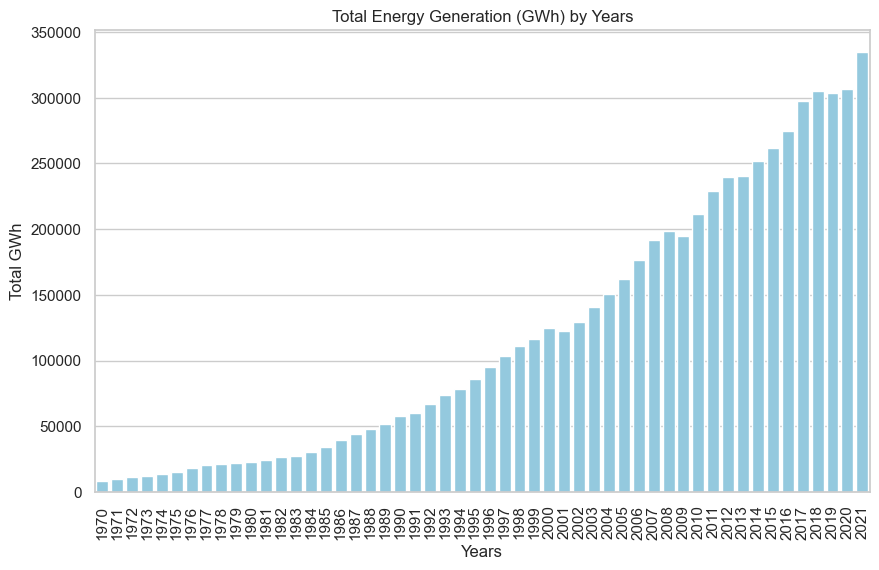

In [43]:
x = df_e_new_numeric.iloc[:, 0]
y = df_e_new_numeric.iloc[:, 1]

sns.set(style="whitegrid")

# Line Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y, color='skyblue')

plt.xticks(rotation=90)
plt.title('Total Energy Generation (GWh) by Years')
plt.xlabel('Years')
plt.ylabel('Total GWh')

plt.show()

It is obvious that Turkey has made serious progress in the field of energy production since 1970.

## Greenhouse Gas Emissions

In [44]:
df_g.head(10)

,"Sera gazı emisyonları (CO2 eşdeğeri), 1990 - 2021",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,"Greenhouse gas emissions (CO2 equivalent), 199...",NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,(Milyon ton - Million tonnes)
2,Yıl\nYear,Toplam\nTotal,CO2,CH4,N2O,F-gazlar\nF-gases
3,1990,219.526151,151.614981,42.487543,24.950823,0.472804
4,1991,226.794721,158.126315,43.377429,24.733992,0.556985
5,1992,233.132483,164.064876,43.288202,25.25965,0.519754
6,1993,240.771746,171.138875,43.06554,26.048287,0.519045
7,1994,234.38783,167.565647,42.787878,23.570421,0.463884
8,1995,248.248909,181.355257,42.613471,23.870854,0.409326
9,1996,267.581386,199.646693,42.968946,24.54246,0.423287


In [45]:
df_g.iloc[3:35]

,"Sera gazı emisyonları (CO2 eşdeğeri), 1990 - 2021",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
3,1990,219.526151,151.614981,42.487543,24.950823,0.472804
4,1991,226.794721,158.126315,43.377429,24.733992,0.556985
5,1992,233.132483,164.064876,43.288202,25.25965,0.519754
6,1993,240.771746,171.138875,43.06554,26.048287,0.519045
7,1994,234.38783,167.565647,42.787878,23.570421,0.463884
8,1995,248.248909,181.355257,42.613471,23.870854,0.409326
9,1996,267.581386,199.646693,42.968946,24.54246,0.423287
10,1997,278.813841,212.108198,42.231314,24.050525,0.423804
11,1998,280.318959,212.135043,42.421875,25.338883,0.423158
12,1999,277.776799,207.927912,43.789483,25.636443,0.422961


In [46]:
df_g_new = df_g.iloc[3:35,:] #Clean data

In [47]:
df_g_new.columns = ['Year','Total','CO2','CH4','N2O','F-Gases']
df_g_new.head()

,Year,Total,CO2,CH4,N2O,F-Gases
3,1990,219.526151,151.614981,42.487543,24.950823,0.472804
4,1991,226.794721,158.126315,43.377429,24.733992,0.556985
5,1992,233.132483,164.064876,43.288202,25.25965,0.519754
6,1993,240.771746,171.138875,43.06554,26.048287,0.519045
7,1994,234.38783,167.565647,42.787878,23.570421,0.463884


In [48]:
df_g_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 3 to 34
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     32 non-null     object
 1   Total    32 non-null     object
 2   CO2      32 non-null     object
 3   CH4      32 non-null     object
 4   N2O      32 non-null     object
 5   F-Gases  32 non-null     object
dtypes: object(6)
memory usage: 1.6+ KB


In [49]:
df_g_new_numeric = df_g_new.apply(pd.to_numeric, errors='coerce') #Categoric to Numeric

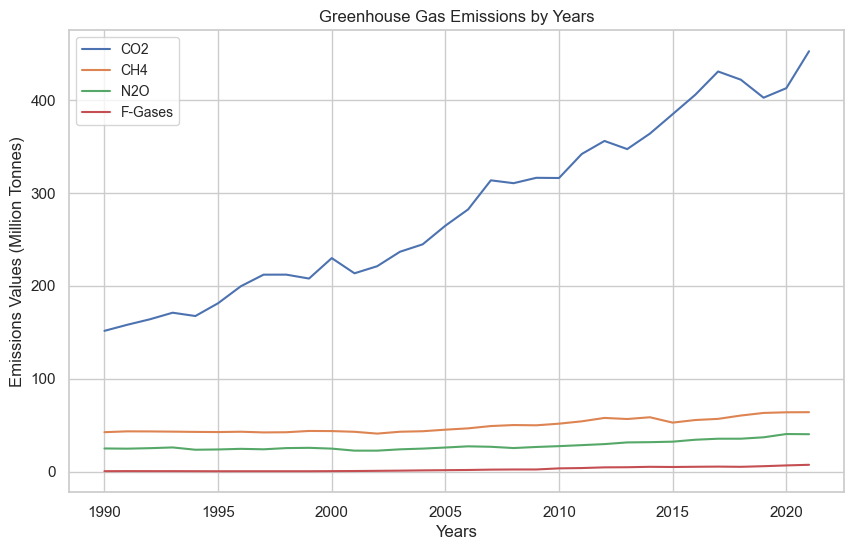

In [50]:
carbon_columns = df_g_new_numeric.columns[2:]

# Years 
x = df_g_new_numeric.iloc[:, 0]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Line Plot 
for column in carbon_columns:
    y = df_g_new_numeric[column]
    sns.lineplot(x=x, y=y, label=column)

plt.legend(fontsize='small')

plt.title('Greenhouse Gas Emissions by Years')
plt.xlabel('Years')
plt.ylabel('Emissions Values (Million Tonnes)')

plt.show()

The graph shows that the emission of $CO_2$ gas into the atmosphere is increasing day by day, but there is no significant change in the emission of other greenhouse gases. We would not be wrong if we say that our country is facing serious dangers because $CO_2$ gas is the most important greenhouse gas.

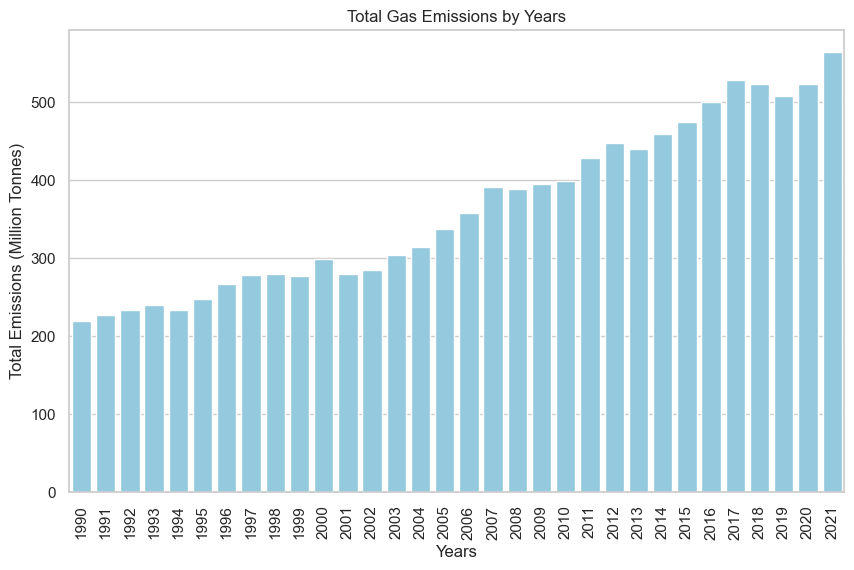

In [51]:
x = df_g_new_numeric.iloc[:, 0]
y = df_g_new_numeric.iloc[:, 1]

sns.set(style="whitegrid")

# Line Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y, color='skyblue')

plt.xticks(rotation=90)
plt.title('Total Gas Emissions by Years')
plt.xlabel('Years')
plt.ylabel('Total Emissions (Million Tonnes)')

plt.show()

In this graph, we can easily observe that total greenhouse gas emissions are increasing over the years almost without any hesitation.

## Death Reasons

In [52]:
df_d.head(20) # We'll use just number of deaths in respiratory system diseases by years

,"Yaş grubu ve cinsiyete göre seçilmiş ölüm nedenlerinin dağılımı, 2009-2017",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110
0,Distribution of selected causes of death by ag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,2009(1),NaN,NaN,NaN,NaN,...,2017(1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,Yaş grubu - Age group,NaN,NaN,NaN,NaN,...,Yaş grubu - Age group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ölüm nedeni,NaN,NaN,NaN,Toplam,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bilinmeyen
4,Cause of death,NaN,NaN,NaN,Total,0 - 14,15 - 24,25 - 34,35 - 44,45 - 54,...,0 - 14,15 - 24,25 - 34,35 - 44,45 - 54,55 - 64,65 - 74,75 - 84,85+,Unknown
5,Toplam,NaN,NaN,Toplam - Total,281504,17825,3682,5031,9369,22973,...,20087,5839,6732,11674,26063,55209,85141,123180,89851,102
6,Total,NaN,NaN,Erkek - Male,155928,9768,2412,3241,6020,15661,...,11117,4363,4772,7480,17430,37671,52355,62518,33287,82
7,NaN,NaN,NaN,Kadın - Female,125576,8057,1270,1790,3349,7312,...,8922,1474,1960,4194,8631,17538,32786,60661,56564,14
8,NaN,NaN,NaN,Bilinmeyen - Unknown,-,-,-,-,-,-,...,48,2,-,-,2,-,-,1,-,6
9,Dolaşım sistemi hastalıkları,NaN,NaN,Toplam - Total,112158,828,336,734,2436,7616,...,546,410,793,2892,8698,19367,33280,55704,45568,7


In [53]:
df_d_new = df_d.iloc[17,[4,16,28,40,52,64,76,88,100]].transpose() # Clean data
df_d_new = pd.DataFrame(df_d_new)
df_d_new['Years'] = range(2009, 2018)
df_d_new.index = range(len(df_d_new)) # index
df_d_new = df_d_new.rename(columns={17: 'Number of Deaths'})
df_d_new

,Number of Deaths,Years
0,24996,2009
1,24418,2010
2,31384,2011
3,31024,2012
4,35331,2013
5,40593,2014
6,43820,2015
7,49296,2016
8,50224,2017


In [54]:
df_d_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Number of Deaths  9 non-null      object
 1   Years             9 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 276.0+ bytes


In [55]:
df_d_new_numeric = df_d_new.apply(pd.to_numeric, errors='coerce') #Categoric to Numeric

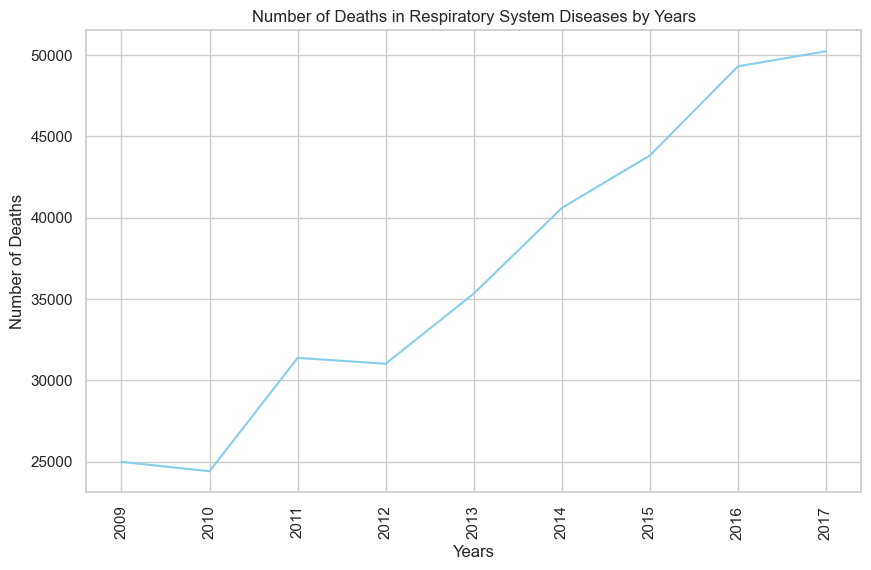

In [56]:
y = df_d_new_numeric.iloc[:, 0]
x = df_d_new_numeric.iloc[:, 1]

sns.set(style="whitegrid")

# Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, color='skyblue')

plt.xticks(rotation=90)
plt.title('Number of Deaths in Respiratory System Diseases by Years')
plt.xlabel('Years')
plt.ylabel('Number of Deaths')

plt.show()

When we look at the graph in general, we see that deaths due to respiratory diseases have doubled in our country in just 8 years. These types of deaths have been increasing without any hesitation, especially since 2012. This situation literally screams that there is something wrong in our country regarding the respiratory systems of our citizens. The aim of this project is to analyze the causes of such deaths in the context of energy production methods and greenhouse gas emissions and to prevent deaths.

# Research Questions and Proposed Tests

## 1st Question
**Is there a significant relationship between greenhouse gas emissions and deaths from respiratory diseases?**

**Hypothesis:** As greenhouse gas emissions increase, deaths due to respiratory diseases will increase.

In [57]:
df_g_new_numeric

,Year,Total,CO2,CH4,N2O,F-Gases
3,1990,219.526151,151.614981,42.487543,24.950823,0.472804
4,1991,226.794721,158.126315,43.377429,24.733992,0.556985
5,1992,233.132483,164.064876,43.288202,25.259650,0.519754
6,1993,240.771746,171.138875,43.065540,26.048287,0.519045
7,1994,234.387830,167.565647,42.787878,23.570421,0.463884
8,1995,248.248909,181.355257,42.613471,23.870854,0.409326
9,1996,267.581386,199.646693,42.968946,24.542460,0.423287
10,1997,278.813841,212.108198,42.231314,24.050525,0.423804
11,1998,280.318959,212.135043,42.421875,25.338883,0.423158
12,1999,277.776799,207.927912,43.789483,25.636443,0.422961


In [58]:
df_corr= pd.DataFrame()
df_corr['Years']=df_g_new_numeric.iloc[19:28,0]
df_corr['Gas Emissions']=df_g_new_numeric.iloc[19:28,1]
df_corr=df_corr.reset_index().drop(['index'],axis=1)
df_corr['#Deaths in Respiratory Diseases']=df_d_new_numeric['Number of Deaths']
df_corr

,Years,Gas Emissions,#Deaths in Respiratory Diseases
0,2009,395.177141,24996
1,2010,398.793165,24418
2,2011,428.617589,31384
3,2012,448.184458,31024
4,2013,440.195301,35331
5,2014,459.489508,40593
6,2015,474.967535,43820
7,2016,501.107906,49296
8,2017,528.565929,50224


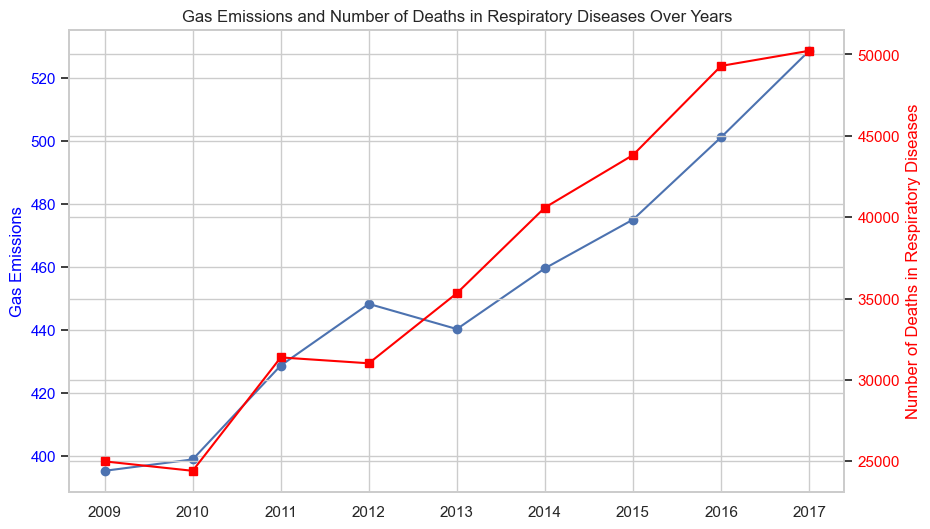

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(df_corr['Years'], df_corr['Gas Emissions'], label='Gas Emissions', marker='o')

plt.ylabel('Gas Emissions', color='blue')
plt.tick_params(axis='y', labelcolor='blue')

plt.twinx()
plt.plot(df_corr['Years'], df_corr['#Deaths in Respiratory Diseases'], label='#Deaths in Respiratory Diseases', 
         marker='s', color='red')
plt.ylabel('Number of Deaths in Respiratory Diseases', color='red')
plt.tick_params(axis='y', labelcolor='red')

plt.title('Gas Emissions and Number of Deaths in Respiratory Diseases Over Years')
plt.xlabel('Years')
plt.show()


It can be seen that greenhouse gas emissions and the number of deaths due to respiratory diseases between 2009 and 2017 draw similar graphs.

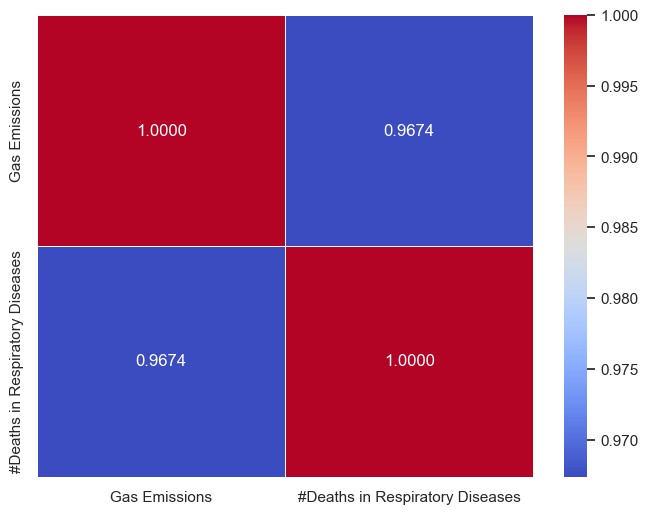

In [60]:
correlation_matrix = df_corr[['Gas Emissions', '#Deaths in Respiratory Diseases']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.show()

The incredibly high correlation value of approximately 97% completely confirms the previous graph. In other words, greenhouse gas emissions seriously affect people's respiratory system health.

## 2nd Question
**How does energy production method relate to the annual number of respiratory deaths?**

**Hypothesis:** While non-environmentally friendly energy sources have an effect on increasing the number of deaths due to respiratory diseases, environmentally friendly energy sources do not have this effect.

In [61]:
df_e_new_numeric['Harmful Sources%'] = df_e_new_numeric[['Coal%', 'Liquid Fuels%', 'Natural Gas%']].sum(axis=1)

df_e_new_numeric['Product by Harmful Sources'] = (df_e_new_numeric['Harmful Sources%'] * df_e_new_numeric['Total (GWh)']) / 100
df_e_new_numeric

,Year,Total (GWh),Coal%,Liquid Fuels%,Natural Gas%,Hydro%,Renewable Energy and Wastes%,Harmful Sources%,Product by Harmful Sources
4,1970,8623.000000,32.700000,30.200000,NaN,35.200000,1.900000,62.900000,5423.867000
5,1971,9781.000000,30.400000,41.200000,NaN,26.700000,1.700000,71.600000,7003.196000
6,1972,11242.000000,26.000000,43.900000,NaN,28.500000,1.600000,69.900000,7858.158000
7,1973,12425.000000,26.100000,51.300000,NaN,21.000000,1.600000,77.400000,9616.950000
8,1974,13477.000000,28.800000,44.800000,NaN,24.900000,1.500000,73.600000,9919.072000
9,1975,15623.000000,26.300000,34.500000,NaN,37.800000,1.400000,60.800000,9498.784000
10,1976,18283.000000,23.700000,29.600000,NaN,45.800000,0.900000,53.300000,9744.839000
11,1977,20565.000000,23.800000,33.400000,NaN,41.700000,1.100000,57.200000,11763.180000
12,1978,21726.000000,25.700000,30.700000,NaN,43.000000,0.600000,56.400000,12253.464000
13,1979,22522.000000,28.600000,25.100000,NaN,45.700000,0.600000,53.700000,12094.314000


In [62]:
df_= pd.DataFrame()
df_['Years']=df_e_new_numeric.iloc[39:48,0]
df_['Product by Harmful Sources']=df_e_new_numeric.iloc[39:48,1]
df_=df_.reset_index().drop(['index'],axis=1)
df_['#Deaths in Respiratory Diseases']=df_d_new_numeric['Number of Deaths']
df_

,Years,Product by Harmful Sources,#Deaths in Respiratory Diseases
0,2009,194813.0,24996
1,2010,211208.0,24418
2,2011,229395.0,31384
3,2012,239497.0,31024
4,2013,240154.0,35331
5,2014,251963.0,40593
6,2015,261783.0,43820
7,2016,274407.7,49296
8,2017,297277.5,50224


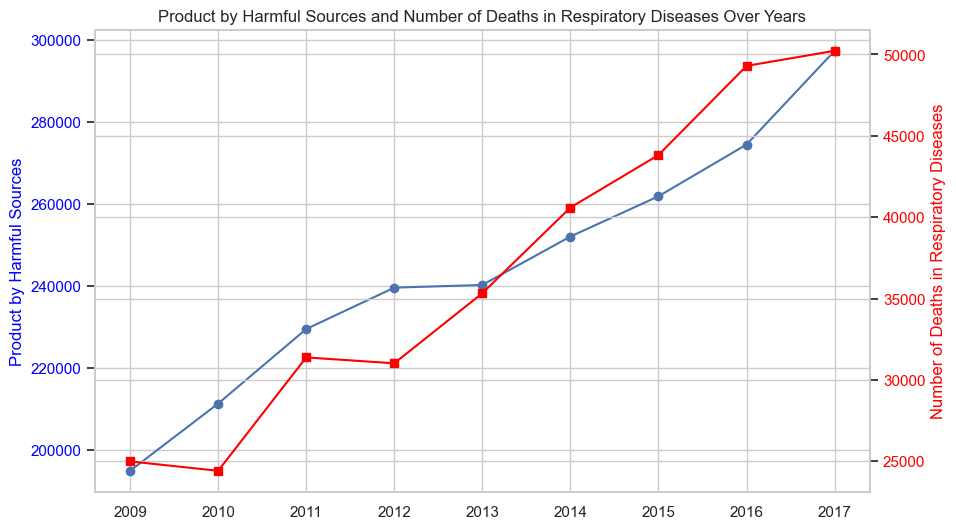

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(df_['Years'], df_['Product by Harmful Sources'], label='Product by Harmful Sources', marker='o')

plt.ylabel('Product by Harmful Sources', color='blue')
plt.tick_params(axis='y', labelcolor='blue')

plt.twinx()
plt.plot(df_['Years'], df_['#Deaths in Respiratory Diseases'], label='#Deaths in Respiratory Diseases', marker='s',
         color='red')
plt.ylabel('Number of Deaths in Respiratory Diseases', color='red')
plt.tick_params(axis='y', labelcolor='red')

plt.title('Product by Harmful Sources and Number of Deaths in Respiratory Diseases Over Years')
plt.xlabel('Years')
plt.show()


It is seen that deaths due to respiratory diseases have also increased with the increase in the use of environmentally harmful resources in energy production within the specified time period. These sources directly or indirectly cause an increase in greenhouse gas emissions and harm the health of the respiratory system.

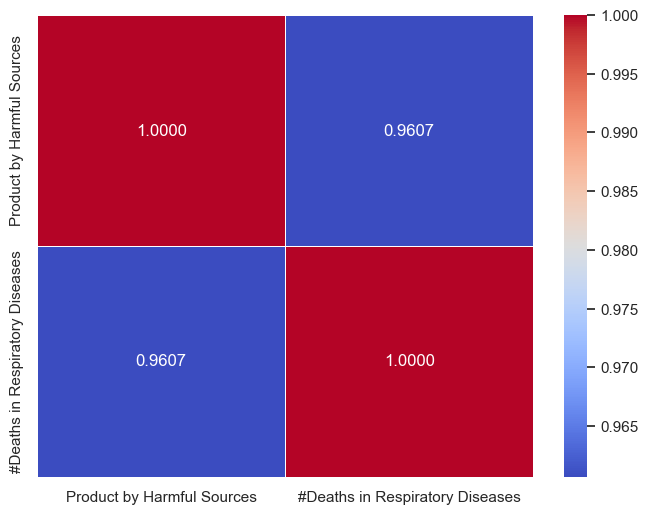

In [64]:
correlation_matrix = df_[['Product by Harmful Sources', '#Deaths in Respiratory Diseases']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.show()

## 3rd Question
**What is the relationship between the energy production method and the amount of greenhouse gases in the atmosphere?**

**Hypothesis:** The use of non-environmentally friendly, non-renewable energy sources increases greenhouse gas emissions.

In [65]:
dff= pd.DataFrame()
dff['Years']=df_e_new_numeric.iloc[20:52,0]
dff['Product by Harmful Sources']=df_e_new_numeric.iloc[20:52,1]
dff=dff.reset_index().drop(['index'],axis=1)
df_g_new_numeric=df_g_new_numeric.reset_index().drop(['index'],axis=1)
dff['Total Gas Emission']=df_g_new_numeric.iloc[:,1]
dff

,Years,Product by Harmful Sources,Total Gas Emission
0,1990,57543.000000,219.526151
1,1991,60246.000000,226.794721
2,1992,67342.000000,233.132483
3,1993,73808.000000,240.771746
4,1994,78322.000000,234.387830
5,1995,86247.000000,248.248909
6,1996,94862.000000,267.581386
7,1997,103296.000000,278.813841
8,1998,111022.000000,280.318959
9,1999,116440.000000,277.776799


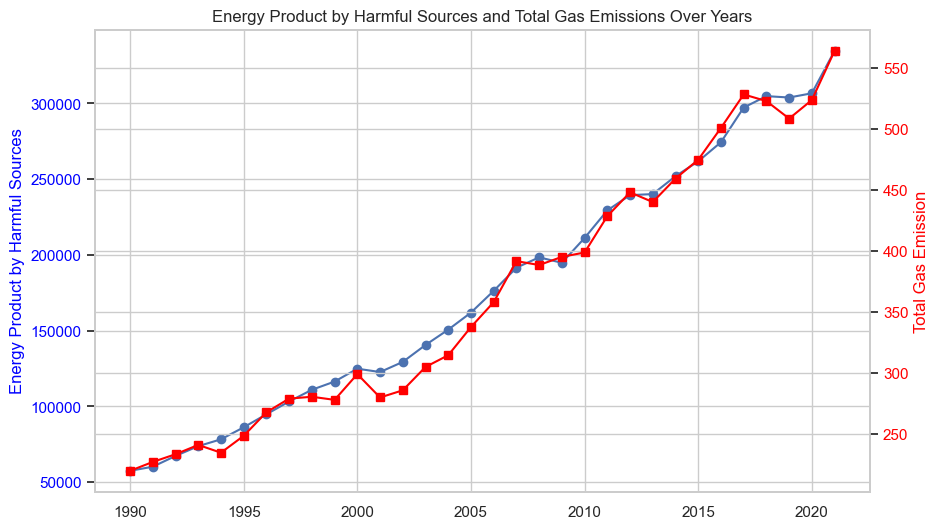

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(dff['Years'], dff['Product by Harmful Sources'], label='Product by Harmful Sources', marker='o')

plt.ylabel('Energy Product by Harmful Sources', color='blue')
plt.tick_params(axis='y', labelcolor='blue')

plt.twinx()
plt.plot(dff['Years'], dff['Total Gas Emission'], label='Total Gas Emission', marker='s', color='red')
plt.ylabel('Total Gas Emission', color='red')
plt.tick_params(axis='y', labelcolor='red')

plt.title('Energy Product by Harmful Sources and Total Gas Emissions Over Years')
plt.xlabel('Years')
plt.show()

The line graph formed by the amount of energy produced from harmful sources and the greenhouse gas released into the atmosphere is almost parallel to each other. This supports our hypothesis.

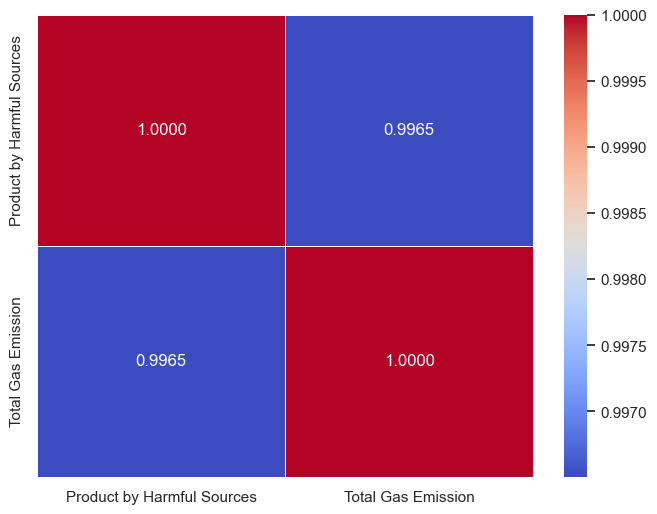

In [67]:
correlation_matrix = dff[['Product by Harmful Sources', 'Total Gas Emission']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.show()

These two features show an almost 100% correlation, proving that energy production sources have a very important role in greenhouse gas emissions.

## 4th Question
**In the light of available data, what will be the estimated number of deaths due to respiratory diseases in the coming years?**

**Hypothesis:** Since Turkey produces more energy every year, if the primary energy production sources are not determined as environmentally friendly sources, deaths due to respiratory diseases will continue to increase.

After creating a complete data set by combining all data sets, the number of deaths due to respiratory diseases can be predicted for the following years by training a linear regression model. If current energy production policies are continued in a similar way, the policy to be followed can be optimized by having a prediction about how the health status of citizens will be affected.